In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('stage_1_train.csv')
num_labels = len(data)
num_positive = 0
num_negative = 0

base_dir = '/Users/TheBestKid/Desktop/Brain_Hemorrhaging'

for i in data['Label']:
    if int(i) == 1:
        num_positive = num_positive + 1
    elif int(i) == 0:
        num_negative = num_negative + 1
    else:
        print(str(i) + 'neither')

In [15]:
print('Total: ' + str(num_labels))
print('Positive: ' + str(num_positive))
print('Negative: ' + str(num_negative))

Total: 4045572
Positive: 230812
Negative: 3814760


In [16]:
sub_types = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural', 'any']

In [17]:
sub_pos_neg = []
for i in sub_types:
    sub_pos_neg.extend([i + '_positive', i + '_negative'])
sub_pos_neg_counts = dict(zip(sub_pos_neg, [0,0,0,0,0,0,0,0,0,0,0,0]))

In [18]:
all_ids = []
for i in range(len(data['ID'])):
    if i % 6 == 0:
        all_ids.append(str(data.iloc[i, 0])[3:12])

len(all_ids)
            

674262

In [19]:
total_neg = 0
total_pos = 0


for i in range(len(data['ID'])):
    if i % 6 == 0:
        if int(data.iloc[i, 1]) == 1:
            sub_pos_neg_counts['epidural_positive'] += 1
            total_pos += 1
        else:
            sub_pos_neg_counts['epidural_negative'] += 1
            total_neg += 1
    elif i % 6 == 1:
        if int(data.iloc[i, 1]) == 1:
            sub_pos_neg_counts['intraparenchymal_positive'] += 1
            total_pos += 1
        else:
            sub_pos_neg_counts['intraparenchymal_negative'] += 1
            total_neg += 1
    elif i % 6 == 2:
        if int(data.iloc[i, 1]) == 1:
            sub_pos_neg_counts['intraventricular_positive'] += 1
            total_pos += 1
        else:
            sub_pos_neg_counts['intraventricular_negative'] += 1
            total_neg += 1
    elif i % 6 == 3:
        if int(data.iloc[i, 1]) == 1:
            sub_pos_neg_counts['subarachnoid_positive'] += 1
            total_pos += 1
        else:
            sub_pos_neg_counts['subarachnoid_negative'] += 1
            total_neg += 1
    elif i % 6 == 4:
        if int(data.iloc[i, 1]) == 1:
            sub_pos_neg_counts['subdural_positive'] += 1
            total_pos += 1
        else:
            sub_pos_neg_counts['subdural_negative'] += 1
            total_neg += 1
    elif i % 6 == 5:
        if int(data.iloc[i, 1]) == 1:
            sub_pos_neg_counts['any_positive'] += 1
            total_pos +=1
        else:
            sub_pos_neg_counts['any_negative'] += 1
            total_neg += 1
    else:
        print('mistake')



In [20]:
sub_pos_neg_counts

{'epidural_positive': 2761,
 'epidural_negative': 671501,
 'intraparenchymal_positive': 32564,
 'intraparenchymal_negative': 641698,
 'intraventricular_positive': 23766,
 'intraventricular_negative': 650496,
 'subarachnoid_positive': 32122,
 'subarachnoid_negative': 642140,
 'subdural_positive': 42496,
 'subdural_negative': 631766,
 'any_positive': 97103,
 'any_negative': 577159}

In [21]:
percents = []

for i in sub_types:
    percents.append((sub_pos_neg_counts[i + '_positive'] / len(all_ids), sub_pos_neg_counts[i + '_negative'] / len(all_ids)))

percents

[(0.0040948474035315645, 0.9959051525964684),
 (0.04829576633415497, 0.951704233665845),
 (0.035247426074730595, 0.9647525739252694),
 (0.047640234804868134, 0.9523597651951319),
 (0.06302594540401209, 0.9369740545959879),
 (0.14401375133108496, 0.855986248668915)]

In [10]:
ticks = ['epidural', 'ip', 'iv', 'sa', 'sd', 'any']
num = np.arange(6)
neg = []
pos = []
for i in percents:
    neg.append(i[0]*(100))
    pos.append((i[1]*100) / 2)

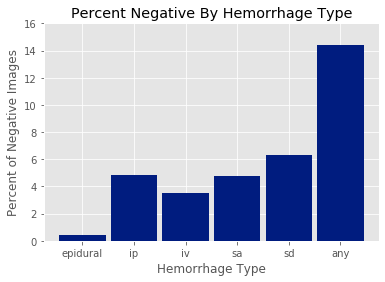

In [12]:
plt.bar(num, neg, 0.9)
plt.style.use(['ggplot', 'seaborn-dark-palette'])

plt.xticks(num, ticks)
plt.yticks(np.arange(0, 17, 2))
plt.ylabel('Percent of Negative Images')
plt.xlabel('Hemorrhage Type')
plt.title('Percent Negative By Hemorrhage Type')

plt.show()

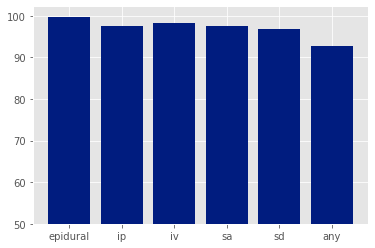

In [13]:
plt.bar(num, pos, 0.8, bottom=50)

plt.xticks(num, ticks)
plt.yticks(np.arange(50, 110, step=10))

plt.show()

In [110]:
print(list(sub_pos_neg_counts.keys())[1][-8:])

negative


In [111]:
#from See like a radiologist with systematic windowing
import pydicom as dcm
def window_image(img, window_center, window_width, intercept, slope):
    img = (img*slope + intercept)
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    img[img<img_min] = img_min
    img[img>img_max] = img_max
    
    img = (img - img_min) / (img_max - img_min)
    return img

def get_windowing(data):
    dicom_fields = [data[('0028', '1050')].value, data[('0028', '1051')].value, 
                    data[('0028', '1052')].value, data[('0028', '1053')].value]
    int_fields = []
    for x in dicom_fields:
        if type(x) == dcm.multival.MultiValue:
            int_fields.append(int(x[0]))
        else:
            int_fields.append(int(x))
    return int_fields

In [112]:
import cv2
import os
import png


img_file = os.path.join(base_dir, 'ID_0001de0e8.dcm')
img_data = dcm.read_file(img_file)
window_center, window_width, intercept, slope = get_windowing(img_data)
img = dcm.read_file(img_file).pixel_array
epidural = window_image(img, 600, 2800, intercept, slope)
brain = window_image(img, 40, 80, intercept, slope)
subdural = window_image(img, 80, 200, intercept, slope)

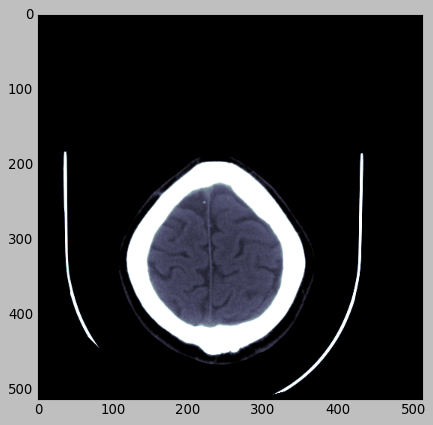

In [126]:
plt.imshow(subdural, cmap=plt.cm.bone)
plt.style.use('classic')
plt.imsave('subdural.jpg', subdural, cmap=plt.cm.bone)

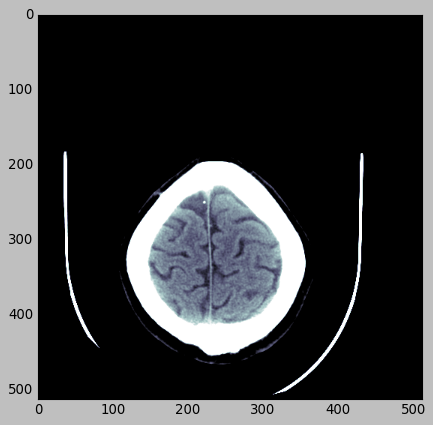

In [127]:
plt.imshow(brain, cmap=plt.cm.bone)
plt.imsave('brain.jpg', brain, cmap=plt.cm.bone)

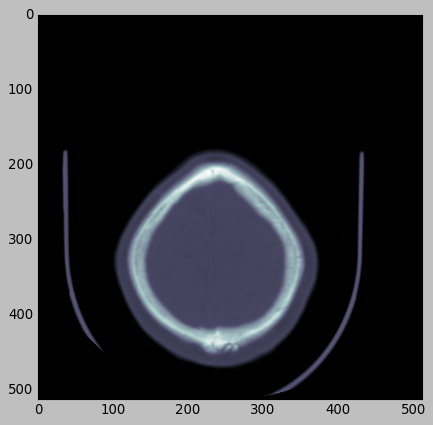

In [128]:
plt.imshow(epidural, cmap=plt.cm.bone)
plt.imsave('epidural.jpg', epidural, cmap=plt.cm.bone)